<a href="https://colab.research.google.com/github/sedekh/Cluster/blob/main/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#import librari
import numpy as np #matrik data
import pandas as pd #dataframe
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [50]:
#loading data
iris = datasets.load_iris() #ambil sampel data dataset dari sklearn namanya iris
print(iris.feature_names)
#kita ambil sepal length dan sepal width untuk jadi variabel independen semua,
#tetapi sepal length kita jadikan var x, dan sepal width var y

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [51]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [52]:
df = pd.DataFrame({
    'x' : iris.data[:,0],
    'y' : iris.data[:,1],
    'cluster' : iris.target #cluster ini terbentuk otomatis menjadi k=3, 'setosa', 'versicolor', 'virginica'
    #klu kita buat kurang dari 3 atau lebih datanya menjadi kacau
    #karena data iris ini adalah data klasifikasi yang mempunyai label
    #'setosa', 'versicolor', 'virginica'
})

In [53]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [54]:
#tampilkan semua record dalam bentuk centroid/titik titik
centroids ={}
for i in range(3):
  result_list =[]
  result_list.append(df.loc[df['cluster'] == i]['x'].mean())
  result_list.append(df.loc[df['cluster'] == i]['y'].mean())

  centroids[i] =result_list


In [55]:
centroids

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

Text(0, 0.5, 'Sepal Width')

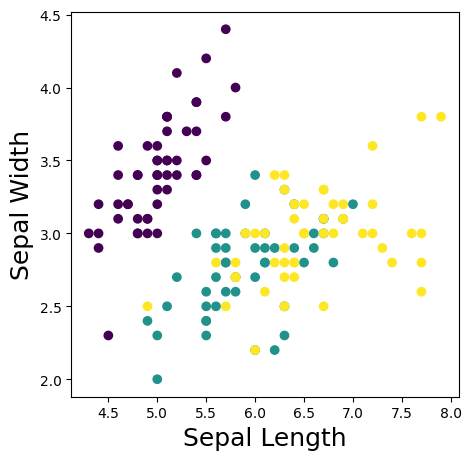

In [56]:
#buat skala/ploting
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c=iris.target) #c= color
plt.xlabel('Sepal Length', fontsize=18)
plt.ylabel("Sepal Width", fontsize=18)

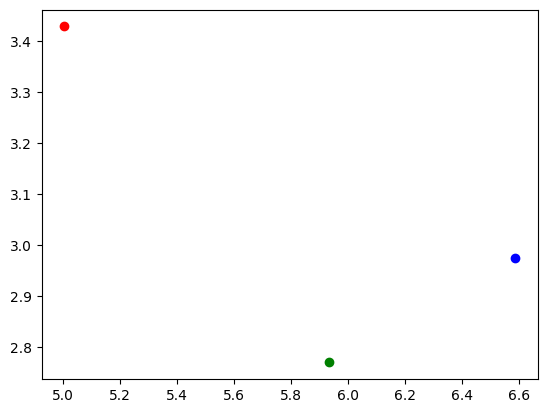

In [57]:
#buat pusat centroid dari setiap kelompok centroid
#centroid yang kita buat adalah 3
colmap = {0: 'r', 1: 'g', 2:'b'} #warna pusat centroid r=merah, green dan blue
for i in centroids.keys(): #atau bisa ubah langsung ke  for i in range(3)
  plt.scatter(centroids[i][0], centroids[i][1], color=colmap[i])
plt.show()

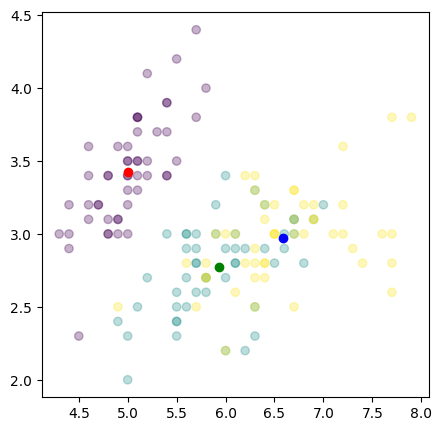

In [58]:
#tampilkan semua centroid
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], c=iris.target, alpha=0.3)#c=warna targe ada 3, alpha= nilai kecerahan scatter
colmap = {0: 'r', 1: 'g', 2:'b'}
col = [0,1]
for i in centroids.keys():
  plt.scatter(centroids[i][0], centroids[i][1], c=colmap[i], edgecolors='face')
plt.show()

In [69]:
#np.__path__
#['/path/to/.venvs/test-py38/lib/python3.8/site-packages/numpy']
#membuat funtion untuk menghitung jarak
def assignment(df, centroids):
  #non-negative square-root
  #sqrt membuat rumus pangkat ((x1 -x2)^2 +(y1 -y2)^2)
  for i in range(3):
    df['distance_form_{}'.format(i)] = (
        np.sqrt(
            (df['x'] - centroids[i][0]) ** 2
             + (df['y'] - centroids[i][1]) ** 2
        )
    )

  centroids_distance_cols =['distance_form_{}'.format(i) for i in centroids.keys()]
  df['closset'] = df.loc[:, centroids_distance_cols].idxmin(axis=1)
  df['closset'] = df['closset'].map(lambda x: int(x.lstrip('distance_from_')))
  df['color'] = df['closset'].map(lambda x: colmap[x])
  return df


In [70]:
df = assignment(df, centroids)

In [73]:
df

,x,y,cluster,distance_form_0,distance_form_1,distance_form_2,closset,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,g
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b
